# Assignment Module 2: Product Classification

The goal of this assignment is to implement a neural network that classifies smartphone pictures of products found in grocery stores. The assignment will be divided into two parts: first, you will be asked to implement from scratch your own neural network for image classification; then, you will fine-tune a pretrained network provided by PyTorch.


## Preliminaries: the dataset

The dataset you will be using contains natural images of products taken with a smartphone camera in different grocery stores:

<p align="center">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Granny-Smith.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Pink-Lady.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Lemon.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Banana.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Vine-Tomato.jpg" width="150">
</p>
<p align="center">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Yellow-Onion.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Green-Bell-Pepper.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Arla-Standard-Milk.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Oatly-Natural-Oatghurt.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Alpro-Fresh-Soy-Milk.jpg" width="150">
</p>

The products belong to the following 43 classes:
```
0.  Apple
1.  Avocado
2.  Banana
3.  Kiwi
4.  Lemon
5.  Lime
6.  Mango
7.  Melon
8.  Nectarine
9.  Orange
10. Papaya
11. Passion-Fruit
12. Peach
13. Pear
14. Pineapple
15. Plum
16. Pomegranate
17. Red-Grapefruit
18. Satsumas
19. Juice
20. Milk
21. Oatghurt
22. Oat-Milk
23. Sour-Cream
24. Sour-Milk
25. Soyghurt
26. Soy-Milk
27. Yoghurt
28. Asparagus
29. Aubergine
30. Cabbage
31. Carrots
32. Cucumber
33. Garlic
34. Ginger
35. Leek
36. Mushroom
37. Onion
38. Pepper
39. Potato
40. Red-Beet
41. Tomato
42. Zucchini
```

The dataset is split into training (`train`), validation (`val`), and test (`test`) set.

The following code cells download the dataset and define a `torch.utils.data.Dataset` class to access it. This `Dataset` class will be the starting point of your assignment: use it in your own code and build everything else around it.

In [6]:
!git clone https://github.com/marcusklasson/GroceryStoreDataset.git

Cloning into 'GroceryStoreDataset'...
remote: Enumerating objects: 6559, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 6559 (delta 45), reused 35 (delta 35), pack-reused 6293
Receiving objects: 100% (6559/6559), 116.26 MiB | 43.07 MiB/s, done.
Resolving deltas: 100% (275/275), done.


In [7]:
from pathlib import Path
from PIL import Image
from torch import Tensor
from torch.utils.data import Dataset
from typing import List, Tuple

In [8]:
class GroceryStoreDataset(Dataset):

    def __init__(self, split: str, transform=None) -> None:
        super().__init__()

        self.root = Path("GroceryStoreDataset/dataset")
        self.split = split
        self.paths, self.labels = self.read_file()

        self.transform = transform

    def __len__(self) -> int:
        return len(self.labels)

    def __getitem__(self, idx) -> Tuple[Tensor, int]:
        img = Image.open(self.root / self.paths[idx])
        label = self.labels[idx]

        if self.transform:
            img = self.transform(img)

        return img, label

    def read_file(self) -> Tuple[List[str], List[int]]:
        paths = []
        labels = []

        with open(self.root / f"{self.split}.txt") as f:
            for line in f:
                # path, fine-grained class, coarse-grained class
                path, _, label = line.replace("\n", "").split(", ")
                paths.append(path), labels.append(int(label))

        return paths, labels

    def get_num_classes(self) -> int:
        return max(self.labels) + 1

## Part 1: design your own network

Your goal is to implement a convolutional neural network for image classification and train it on `GroceryStoreDataset`. You should consider yourselves satisfied once you obtain a classification accuracy on the **validation** split of **around 60%**. You are free to achieve that however you want, except for a few rules you must follow:

- You **cannot** simply instantiate an off-the-self PyTorch network. Instead, you must construct your network as a composition of existing PyTorch layers. In more concrete terms, you can use e.g. `torch.nn.Linear`, but you **cannot** use e.g. `torchvision.models.alexnet`.

- Justify every *design choice* you make. Design choices include network architecture, training hyperparameters, and, possibly, dataset preprocessing steps. You can either (i) start from the simplest convolutional network you can think of and add complexity one step at a time, while showing how each step gets you closer to the target ~60%, or (ii) start from a model that is already able to achieve the desired accuracy and show how, by removing some of its components, its performance drops (i.e. an *ablation study*). You can *show* your results/improvements however you want: training plots, console-printed values or tables, or whatever else your heart desires: the clearer, the better.

Don't be too concerned with your network performance: the ~60% is just to give you an idea of when to stop. Keep in mind that a thoroughly justified model with lower accuracy will be rewarded **more** points than a poorly experimentally validated model with higher accuracy.

## Part 2: fine-tune an existing network

Your goal is to fine-tune a pretrained **ResNet-18** model on `GroceryStoreDataset`. Use the implementation provided by PyTorch, do not implement it yourselves! (i.e. exactly what you **could not** do in the first part of the assignment). Specifically, you must use the PyTorch ResNet-18 model pretrained on ImageNet-1K (V1). Divide your fine-tuning into two parts:

1. First, fine-tune the Resnet-18 with the same training hyperparameters you used for your best model in the first part of the assignment.
1. Then, tweak the training hyperparameters in order to increase the accuracy on the validation split of `GroceryStoreDataset`. Justify your choices by analyzing the training plots and/or citing sources that guided you in your decisions (papers, blog posts, YouTube videos, or whatever else you find enlightening). You should consider yourselves satisfied once you obtain a classification accuracy on the **validation** split **between 80 and 90%**.

---
---

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
import numpy as np
import random
from typing import List, Tuple
from torch import Tensor
from pathlib import Path
from torchvision import transforms as T, datasets
from PIL import Image
from torch.utils.data import random_split, DataLoader
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import ConcatDataset

SEED = 42

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Device: {device}")

def fix_random(seed: int) -> None:
    """
        Fix all the possible sources of randomness.
    """
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

Device: cuda


## Data exploration

### Train and validation distributions

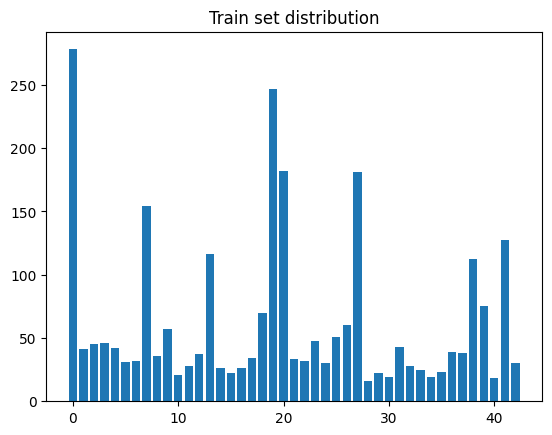

In [10]:
train_data = GroceryStoreDataset(split="train")
unique_train_classes, per_train_class_count = np.unique(train_data.labels, return_counts=True)
plt.title("Train set distribution")
plt.bar(unique_train_classes, per_train_class_count)
plt.show()

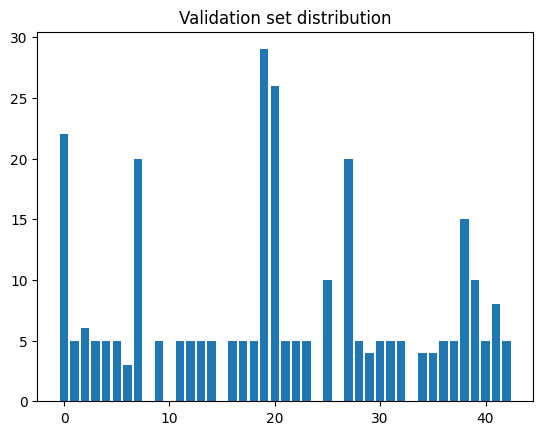

In [11]:
val_data = GroceryStoreDataset(split="val")
unique_val_classes, per_val_class_count = np.unique(val_data.labels, return_counts=True)
plt.title("Validation set distribution")
plt.bar(unique_val_classes, per_val_class_count)
plt.show()

## Data preprocessing

### Dataset loading

In [12]:
NUM_CLASSES = 43
INPUT_WIDTH = 348
INPUT_HEIGHT = 348

tsfms = T.Compose([
    T.ToTensor(),
    T.CenterCrop((INPUT_HEIGHT, INPUT_WIDTH)) # Some images are not the same size
])

train_dset = GroceryStoreDataset(split="train", transform=tsfms)
test_dset = GroceryStoreDataset(split="test", transform=tsfms)
val_dset = GroceryStoreDataset(split="val", transform=tsfms)

### Rebalancing

In [7]:
REBALANCE_DATASET = False

class GroceryStoreDatasetFilteredByLabel(GroceryStoreDataset):
    def __init__(self, split: str, transform=None, label=None) -> None:
        super().__init__(split, transform)

        self.paths = [ p for i, p in enumerate(self.paths) if self.labels[i] == label ]
        self.labels = [label] * len(self.paths)

In [8]:
if REBALANCE_DATASET:
    fix_random(SEED)
    balanced_train_dset = GroceryStoreDataset(split="train", transform=tsfms)
    balanced_count = [ balanced_train_dset.labels.count(i) for i in range(NUM_CLASSES) ]
    biggest_class_size = np.max(balanced_count)

    for i in range(NUM_CLASSES):
        size_label_i = train_dset.labels.count(i)
        increase_factor = round(biggest_class_size / size_label_i)

        for j in range(increase_factor-1):
            augmented_i = GroceryStoreDatasetFilteredByLabel(split="train", transform=augmentation_transforms[j % 2], label=i)
            balanced_train_dset = ConcatDataset([balanced_train_dset, augmented_i])
            balanced_count[i] += len(augmented_i)

    train_dset = balanced_train_dset

    plt.title("Rebalanced train set distribution")
    plt.bar(range(NUM_CLASSES), balanced_count)
    plt.show()

### Augmentation

In [9]:
# Define the data augmentation transformations
USE_DATA_AUGMENTATION = False
AUGMENTATION_FACTOR = 2

augmentation_transforms = [T.Compose([
    T.RandomHorizontalFlip(),
    T.RandomRotation(10),
    T.RandomResizedCrop((INPUT_HEIGHT, INPUT_WIDTH), scale=(0.8, 1.0)),
    T.ToTensor(),
    T.CenterCrop((INPUT_HEIGHT, INPUT_WIDTH)) # Some images are not the same size
]), T.Compose([
    T.RandomHorizontalFlip(),
    T.RandomRotation(10),
    T.RandomResizedCrop((INPUT_HEIGHT, INPUT_WIDTH), scale=(0.8, 1.0)),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    T.ToTensor(),
    T.CenterCrop((INPUT_HEIGHT, INPUT_WIDTH)) # Some images are not the same size
])]

# Check if thge file 'train_dset.pt' exists
if Path('train_dset.pt').exists():
    train_dset = torch.load('train_dset.pt')
else:
    # Concatenate the original and augmented training datasets
    if USE_DATA_AUGMENTATION:
        fix_random(SEED)
        print(f'Train dataset size before augmentation: {len(train_dset)}')
        for i in range(AUGMENTATION_FACTOR):
            for j in range(len(augmentation_transforms)):
                augmented_train_dset = GroceryStoreDataset(split="train", transform=augmentation_transforms[j])
                train_dset = ConcatDataset([train_dset, augmented_train_dset])
        print(f'Train dataset size after augmentation: {len(train_dset)}')
        # Dump the whole dataset for later use in order to avoid recomputing the augmentations
        torch.save(train_dset, 'train_dset.pt')

In [13]:
def evaluate(model, test_dl, device):
    corrects = 0
    total = 0
    model = model.to(device)

    with torch.no_grad():
        model.eval()
        for image, labels in test_dl:
            image, labels = image.to(device), labels.to(device)
            pred_logits = model(image)
            _, preds = torch.max(pred_logits, 1)
            corrects += (preds == labels).sum().item()
            total += labels.shape[0]

    return corrects / total

## Part 1

### Basic Model

Each Convolutional block in the network has the following structure:
1. 2D Convolution
2. SiLU Activation Function
3. Max Pooling
4. Batch Normalization
5. Dropout

In [14]:
class ConvBlock(nn.Module):
    def __init__(self, kernel_size, in_channels, out_channels, activation):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.activation = activation

        self.block = nn.Sequential(
            nn.Conv2d(
                in_channels = in_channels,
                out_channels = out_channels,
                kernel_size = kernel_size,
                stride = 2,
                padding = "valid"
            ),
            nn.BatchNorm2d(out_channels),
            activation,
            nn.Conv2d(
                in_channels = out_channels,
                out_channels = out_channels,
                kernel_size = kernel_size,
                stride = 1,
                padding = "same"
            ),
            nn.BatchNorm2d(out_channels),
            # activation,
            # nn.Conv2d(
            #     in_channels = out_channels,
            #     out_channels = out_channels,
            #     kernel_size = kernel_size,
            #     stride = 1,
            #     padding = "same"
            # ),
            # nn.BatchNorm2d(out_channels),
        )

        self.skip_block = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding="valid")

    def forward(self, x):
        # Residual connection
        residual = self.skip_block(x)
        x = self.block(x) + residual
        return self.activation(x)


### First Model

In [33]:
class FirstModel(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        self.stem_block = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=24, kernel_size=5, stride=2, padding="valid"),
            nn.BatchNorm2d(24),
            nn.SiLU(),
            nn.Conv2d(in_channels=24, out_channels=32, kernel_size=5, stride=2, padding="valid"),
            nn.BatchNorm2d(32),
            nn.SiLU()
        )

        self.conv_block_1 = ConvBlock(kernel_size=3, in_channels=32, out_channels=64, activation=nn.SiLU())
        self.conv_block_2 = ConvBlock(kernel_size=3, in_channels=64, out_channels=128, activation=nn.SiLU())
        # self.conv_block_3 = ConvBlock(kernel_size=3, in_channels=256, out_channels=512, activation=nn.SiLU())

        self.linear_block = nn.Sequential(
            nn.Linear(128, 1024),
            nn.BatchNorm1d(1024),
            nn.SiLU(),
            nn.Dropout(p=0.5),
            nn.Linear(1024, n_classes)
        )

    def forward(self, x):
        x = self.stem_block(x)

        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        # x = self.conv_block_3(x)

        # Before flattening the tensor, to further reduce the parameters
        # we use adaptive average pooling
        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = torch.flatten(x, 1)

        x = self.linear_block(x)
        return x


In [34]:
import os
import json


def train(
    model,
    loss_fn,
    optimizer,
    scheduler,
    train_dl,
    val_dl,
    device,
    n_epochs,
    early_stop_val_acc = 0.6,
    checkpoint_path = None,
    logging_path = None
):
    if checkpoint_path is not None: os.makedirs(checkpoint_path, exist_ok=True)
    if logging_path is not None: os.makedirs(logging_path, exist_ok=True)

    history = []
    model = model.to(device)
    loss_fn = loss_fn.to(device)

    for epoch in (pbar := tqdm(range(n_epochs))):
        batch_train_accuracies = []
        batch_train_losses = []
        batch_train_times = []
        batch_val_accuracy = 0
        batch_val_loss = 0


        # Train
        model.train()
        for i, (images, labels) in enumerate(train_dl):
            pbar.set_description(f"Epoch {epoch+1} ({i+1}/{len(train_dl)})")
            if device == "cuda":
                start_time = torch.cuda.Event(enable_timing=True)
                end_time = torch.cuda.Event(enable_timing=True)
            images, labels = images.to(device), labels.to(device)

            if device == "cuda": start_time.record()
            optimizer.zero_grad()
            pred_logits = model(images)
            loss = loss_fn(pred_logits, labels)
            loss.backward()
            optimizer.step()
            if device == "cuda": end_time.record()

            _, preds = torch.max(pred_logits, 1)
            batch_train_accuracies.append((preds == labels).sum().item() / labels.size(0))
            batch_train_losses.append(loss.item())
            if device == "cuda":
                torch.cuda.synchronize()
                batch_train_times.append(start_time.elapsed_time(end_time))
        if scheduler is not None:
            scheduler.step()

        # Validation
        model.eval()
        with torch.no_grad():
            for images, labels in val_dl:
                images, labels = images.to(device), labels.to(device)
                preds_logits = model(images)
                _, pred = torch.max(preds_logits, 1)
                batch_val_accuracy += (pred == labels).sum().item()
                batch_val_loss += loss_fn(preds_logits, labels).item() * labels.shape[0]
        batch_val_accuracy = batch_val_accuracy / len(val_dl.dataset)
        batch_val_loss = batch_val_loss / len(val_dl.dataset)

        print(
            f"Epoch {epoch + 1:<3} | "
            f"train_acc: {np.mean(batch_train_accuracies):.4f} "
            f"train_loss: {np.mean(batch_train_losses):.4f} "
            f"val_acc: {batch_val_accuracy:.4f} "
            f"val_loss: {batch_val_loss:.4f}",
        )

        # Checkpoint
        if checkpoint_path is not None:
            torch.save({
                "state_dict": model.state_dict(),
                "architecture": str(model)
            }, os.path.join(checkpoint_path, f"epoch{epoch+1}.ckp.pt"))

        # Logging
        epoch_logs = {
            "epoch": epoch + 1,
            "batch_train_accuracies": batch_train_accuracies,
            "batch_train_losses": batch_train_losses,
            "batch_train_times": batch_train_times,
            "batch_val_accuracy": batch_val_accuracy,
            "batch_val_loss": batch_val_loss
        }
        if logging_path is not None:
            with open(os.path.join(logging_path, f"epoch{epoch+1}.log.json"), "w") as f:
                json.dump(epoch_logs, f, indent=3)
        history.append(epoch_logs)

        if batch_val_accuracy >= early_stop_val_acc:
            break

    return history


In [42]:
def runForMultipleSeeds(num_runs, random_seed):
    rng = np.random.default_rng(random_seed)
    run_histories = [None] * num_runs
    
    for i in range(num_runs):
        curr_seed = int(rng.integers(0, 2**32-1))
        fix_random(curr_seed)
        print(f"Running with seed: {curr_seed}")
        
        model = FirstModel(NUM_CLASSES).to(device)
        optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.2)
        scheduler = None
        train_dl = DataLoader(train_dset, 64, shuffle=True)

        run_histories[i] = train(
            model = model,
            loss_fn = nn.CrossEntropyLoss(),
            optimizer = optimizer,
            scheduler = scheduler,
            train_dl = train_dl,
            val_dl = DataLoader(val_dset, 256),
            device = device,
            n_epochs = 50,
            early_stop_val_acc = 0.6,
            checkpoint_path = f"./checkpoints{i}",
            logging_path = f"./logs{i}"
        )
        
    return run_histories

In [44]:
histories = runForMultipleSeeds(2, SEED)

Running with seed: 383329927


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1   | train_acc: 0.2418 train_loss: 3.1069 val_acc: 0.0676 val_loss: 3.5651
Epoch 2   | train_acc: 0.3731 train_loss: 2.5148 val_acc: 0.2872 val_loss: 2.7100
Epoch 3   | train_acc: 0.4334 train_loss: 2.2093 val_acc: 0.2601 val_loss: 2.5549
Epoch 4   | train_acc: 0.4795 train_loss: 1.9816 val_acc: 0.3041 val_loss: 2.4688
Epoch 5   | train_acc: 0.5126 train_loss: 1.8009 val_acc: 0.3514 val_loss: 2.3432
Epoch 6   | train_acc: 0.5461 train_loss: 1.6582 val_acc: 0.3953 val_loss: 2.1889
Epoch 7   | train_acc: 0.5844 train_loss: 1.5233 val_acc: 0.4223 val_loss: 2.2009
Epoch 8   | train_acc: 0.6429 train_loss: 1.4233 val_acc: 0.4155 val_loss: 2.2443
Epoch 9   | train_acc: 0.6685 train_loss: 1.3222 val_acc: 0.4865 val_loss: 1.9044
Epoch 10  | train_acc: 0.7009 train_loss: 1.2376 val_acc: 0.5372 val_loss: 1.8239
Epoch 11  | train_acc: 0.7161 train_loss: 1.1778 val_acc: 0.5135 val_loss: 1.9097
Epoch 12  | train_acc: 0.7444 train_loss: 1.1050 val_acc: 0.5642 val_loss: 1.8573
Epoch 13  | trai

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1   | train_acc: 0.2243 train_loss: 3.1546 val_acc: 0.0811 val_loss: 3.5647
Epoch 2   | train_acc: 0.3906 train_loss: 2.5045 val_acc: 0.2264 val_loss: 2.8436
Epoch 3   | train_acc: 0.4505 train_loss: 2.1687 val_acc: 0.3243 val_loss: 2.4895
Epoch 4   | train_acc: 0.4877 train_loss: 1.9475 val_acc: 0.3209 val_loss: 2.3610
Epoch 5   | train_acc: 0.5093 train_loss: 1.7998 val_acc: 0.3480 val_loss: 2.3706
Epoch 6   | train_acc: 0.5532 train_loss: 1.6252 val_acc: 0.3446 val_loss: 2.3654
Epoch 7   | train_acc: 0.6001 train_loss: 1.5071 val_acc: 0.4493 val_loss: 2.0587
Epoch 8   | train_acc: 0.6239 train_loss: 1.4127 val_acc: 0.3986 val_loss: 2.1269
Epoch 9   | train_acc: 0.6749 train_loss: 1.3021 val_acc: 0.4730 val_loss: 2.0241
Epoch 10  | train_acc: 0.6886 train_loss: 1.2671 val_acc: 0.5034 val_loss: 2.0137
Epoch 11  | train_acc: 0.7236 train_loss: 1.1689 val_acc: 0.4628 val_loss: 2.0381
Epoch 12  | train_acc: 0.7474 train_loss: 1.1101 val_acc: 0.4764 val_loss: 1.9380
Epoch 13  | trai

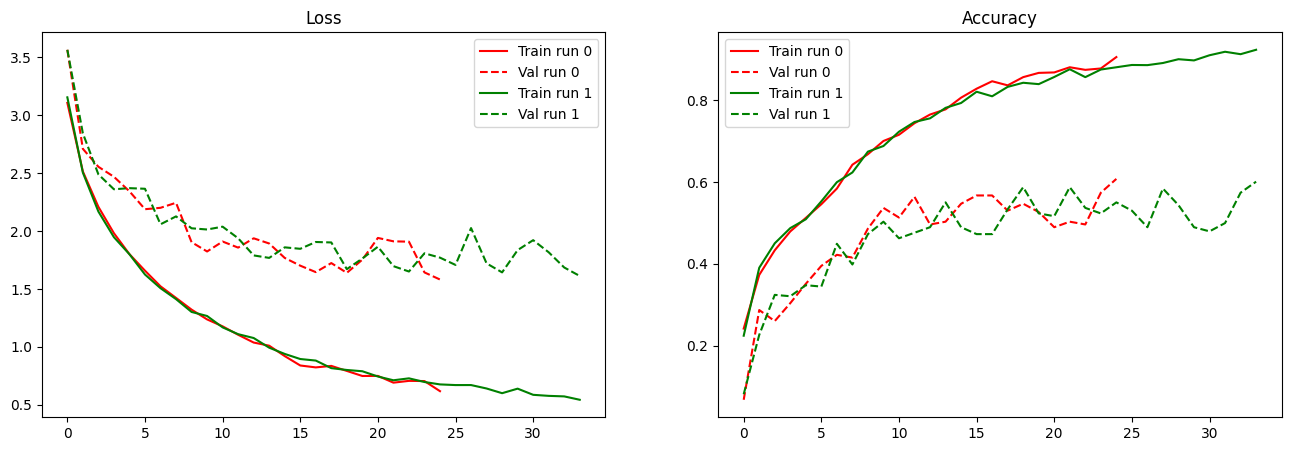

In [49]:
colors = "rgb"

plt.figure(figsize=(16, 5))
for i in range(len(histories)):
    logs = histories[i]
    plt.subplot(1, 2, 1)
    plt.title("Loss")
    plt.plot(range(logs[-1]["epoch"]), [np.mean(logs[i]["batch_train_losses"]) for i in range(len(logs))], label=f"Train run {i}", color=colors[i%len(colors)])
    plt.plot(range(logs[-1]["epoch"]), [logs[i]["batch_val_loss"] for i in range(len(logs))], "--", label=f"Val run {i}", color=colors[i%len(colors)])
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    plt.plot(range(logs[-1]["epoch"]), [np.mean(logs[i]["batch_train_accuracies"]) for i in range(len(logs))], label=f"Train run {i}", color=colors[i%len(colors)])
    plt.plot(range(logs[-1]["epoch"]), [logs[i]["batch_val_accuracy"] for i in range(len(logs))], "--", label=f"Val run {i}", color=colors[i%len(colors)])
    plt.legend()
plt.show()

In [50]:
def print_model_parameters(model):
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param_count = parameter.numel()
        total_params += param_count

    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param_count = parameter.numel()

        print(f"Layer: {name} | Parameters: {param_count/total_params*100:.2f}%")
    print(f"Total Trainable Parameters: {total_params}")

In [51]:
model = FirstModel(NUM_CLASSES).to(device)
print_model_parameters(model)

Layer: stem_block.0.weight | Parameters: 0.32%
Layer: stem_block.0.bias | Parameters: 0.00%
Layer: stem_block.1.weight | Parameters: 0.00%
Layer: stem_block.1.bias | Parameters: 0.00%
Layer: stem_block.3.weight | Parameters: 3.37%
Layer: stem_block.3.bias | Parameters: 0.01%
Layer: stem_block.4.weight | Parameters: 0.01%
Layer: stem_block.4.bias | Parameters: 0.01%
Layer: conv_block_1.block.0.weight | Parameters: 3.24%
Layer: conv_block_1.block.0.bias | Parameters: 0.01%
Layer: conv_block_1.block.1.weight | Parameters: 0.01%
Layer: conv_block_1.block.1.bias | Parameters: 0.01%
Layer: conv_block_1.block.3.weight | Parameters: 6.47%
Layer: conv_block_1.block.3.bias | Parameters: 0.01%
Layer: conv_block_1.block.4.weight | Parameters: 0.01%
Layer: conv_block_1.block.4.bias | Parameters: 0.01%
Layer: conv_block_1.skip_block.weight | Parameters: 3.24%
Layer: conv_block_1.skip_block.bias | Parameters: 0.01%
Layer: conv_block_2.block.0.weight | Parameters: 12.95%
Layer: conv_block_2.block.0.bi

In [ ]:
from torchsummary import summary

summary(model, (3 , INPUT_HEIGHT, INPUT_WIDTH), device=device)